# 01. Dados com muitas dimensões

## Dimensões

As Dimensões são os descritores dos dados oriundos. Possui o caráter qualitativo da informação e relacionamento de “um para muitos” com a tabela Fato. É a Dimensão que permite a visualização das informações por diversos aspectos e perspectivas. 

Ex: Cadastro de clientes, cadastro de formas de pagamento, etc.

![](https://i.imgur.com/jij2WCY.png)

**Por que diminuir o número de dimensões:**
 - Quanto mais dimensões, mais lentamente é o processo de tranformação

 - A alta dimensionalidade pode super-ajustar o modelo
 
 - Aprendizado de máquina é chamado de overfitting: significa que o modelo tem um bom desempenho nos dados de treinamento, mas não generaliza bem.

 - Quanto maior a dimensão, mais espaço de armazenamento.


## Alura Care:
Uma startup fictícia do segmento de saúde que tem por objetivo tornar mais rápida e efetiva a detecção de determinados tipos de câncer. A Alura Care possui uma base de dados contendo o diagnóstico do tipo de câncer, que pode ser maligno (M) ou benigno (B), e diversos exames/dimensões que caracterizam esse diagnóstico.

Temos 33 dimensões nessa base de dados, e a questão que a Alura Care deseja responder é: será possível reduzirmos a necessidade de tantos exames para chegar a um diagnóstico de maneira efetiva?



In [3]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'

resultados_exames = pd.read_csv(url, sep=',')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [4]:
# import pandas_profiling

# pandas_profiling.ProfileReport(resultados_exames)

Utilizando a biblioteca [missingno](https://github.com/ResidentMario/missingno), podemos visualizar a quantidade de dados faltantes por coluna.

In [5]:
!pip install multimethod

Utilizando o *pandas* para criar um gráfico de barras com a quantidade de dados faltantes por coluna.

<AxesSubplot:title={'center':'Percentual de dados não nulos'}>

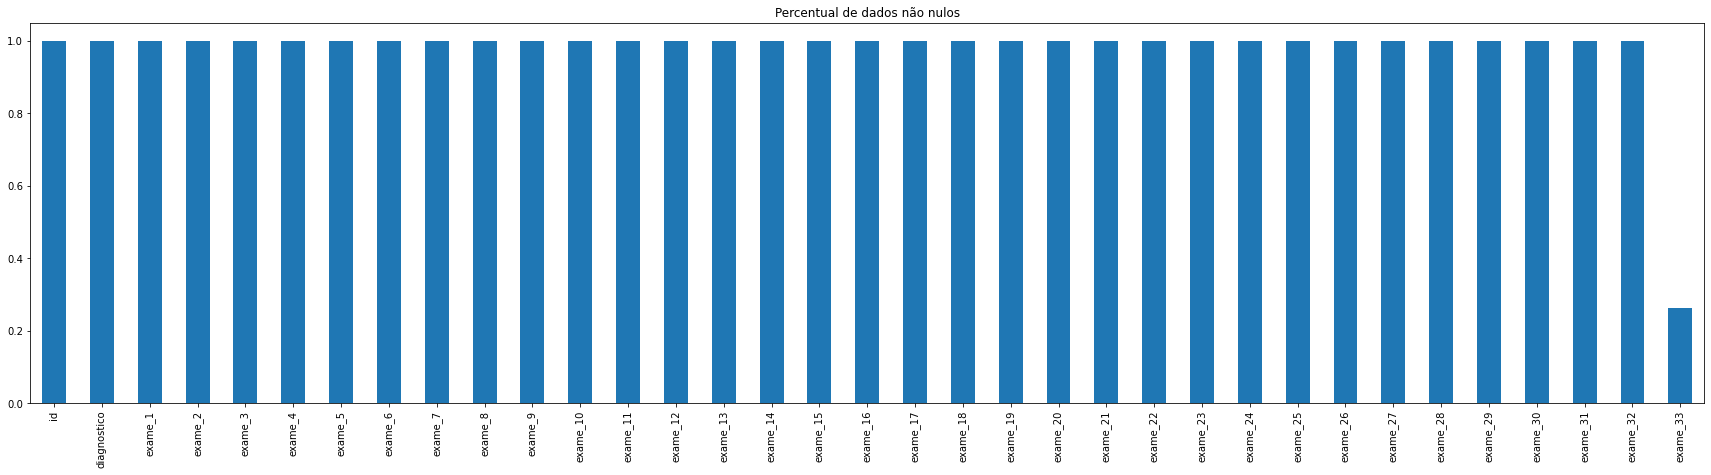

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30,7))
plt.title("Percentual de dados não nulos")
(1 - resultados_exames.isnull().mean()).abs().plot.bar(ax=ax)

# Gráfico abaixo nos retorna o percentual de dados não ausentes em nossa base de dados.

O algoritmo de aprendizado que será utilizado é o *RandomForestClassifier*.

Documentação disponível no [link](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

![](https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames['diagnostico']

# Removendo a coluna do exame 33 pois contém dados nulos:
valores_exames_v1 = valores_exames.drop(columns=['exame_33'])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

# calculando a acurácia:
print(str(classificador.score(teste_x, teste_y)*100) + '%')

92.39766081871345%


In [9]:
# Fazendo um baseline com o DummyClassifier, que basicamente chuta todos os resultados como 1 ou 0:


from sklearn.dummy import DummyClassifier

SEED = 123143
random.seed(SEED)

classificador_bobo = DummyClassifier(strategy='most_frequent')
classificador_bobo.fit(treino_x, treino_y)
print('Acurácia de ' + str(classificador_bobo.score(teste_x, teste_y)*100) + '%')

Acurácia de 66.66666666666666%


Logo nosso baseline será de 92.4%

# 02. Avançando e explorando dados

Será utilizado a visualização em [violino](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

In [21]:
# dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
# dados_plot.head()

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809


In [22]:
# dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='teste', value_name='valores')
# dados_plot.head(5)

,diagnostico,teste,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

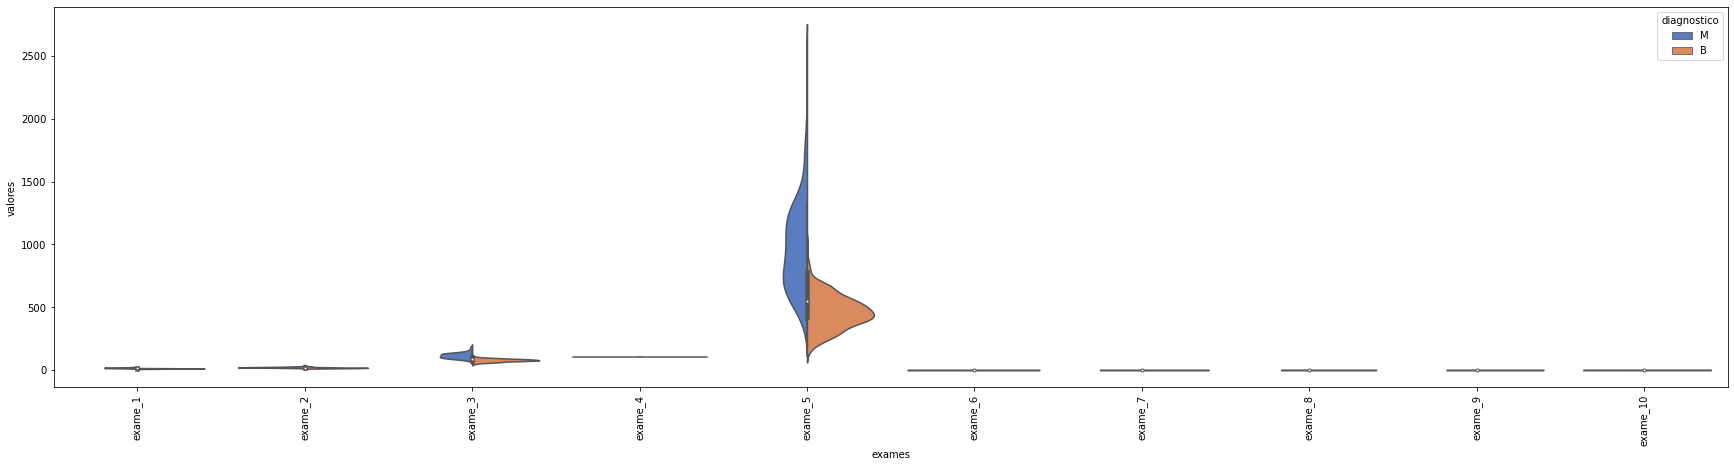

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_plot = pd.concat([diagnostico, valores_exames_v1.iloc[:,0:10]], axis=1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(30,7))
sns.violinplot(x = 'exames', y = 'valores', hue='diagnostico', data=dados_plot, palette="muted", split=True)
plt.xticks(rotation = 90)

In [24]:
dados_plot

,diagnostico,exames,valores
0,M,exame_1,17.9900
1,M,exame_1,20.5700
2,M,exame_1,19.6900
3,M,exame_1,11.4200
4,M,exame_1,20.2900
...,...,...,...
5685,M,exame_10,0.1726
5686,M,exame_10,0.1752
5687,M,exame_10,0.1590
5688,M,exame_10,0.2397


Como a escala do eixo Y está com valores muito discrepantes a visualização fica muito prejudicada, vamos usar a função StandartScaler do sklearn para normalizar.


[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) é utilizado para normalizar os dados:

![](https://i.stack.imgur.com/Z7ATR.png)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Realizando a padronização
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)

valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())
valores_exames_v2.head(10)

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100
5,-0.476375,-0.835335,-0.387148,1.421085e-14,-0.505650,2.237421,1.244335,0.866302,0.824656,1.005402,...,-0.313836,-0.115009,-0.244320,2.048513,1.721616,1.263243,1.110223e-16,0.905888,1.754069,2.241802
6,1.170908,0.160649,1.138125,1.421085e-14,1.095295,-0.123136,0.088295,0.300072,0.646935,-0.064325,...,0.322883,1.368325,1.275220,0.518640,0.021215,0.509552,1.110223e-16,1.196716,0.262476,-0.014730
7,-0.118517,0.358450,-0.072867,1.421085e-14,-0.218965,1.604049,1.140102,0.061026,0.281950,1.403355,...,0.401048,0.099449,0.028859,1.447961,0.724786,-0.021054,1.110223e-16,0.624196,0.477640,1.726435
8,-0.320167,0.588830,-0.184080,1.421085e-14,-0.384207,2.201839,1.684010,1.219096,1.150692,1.965600,...,0.822813,-0.031609,-0.248363,1.662757,1.818310,1.280035,1.110223e-16,1.391616,2.389857,1.288650
9,-0.473535,1.105439,-0.329482,1.421085e-14,-0.509063,1.582699,2.563358,1.738872,0.941760,0.797298,...,2.443109,-0.286278,-0.297409,2.320295,5.112877,3.995433,1.110223e-16,1.620015,2.370444,6.846856


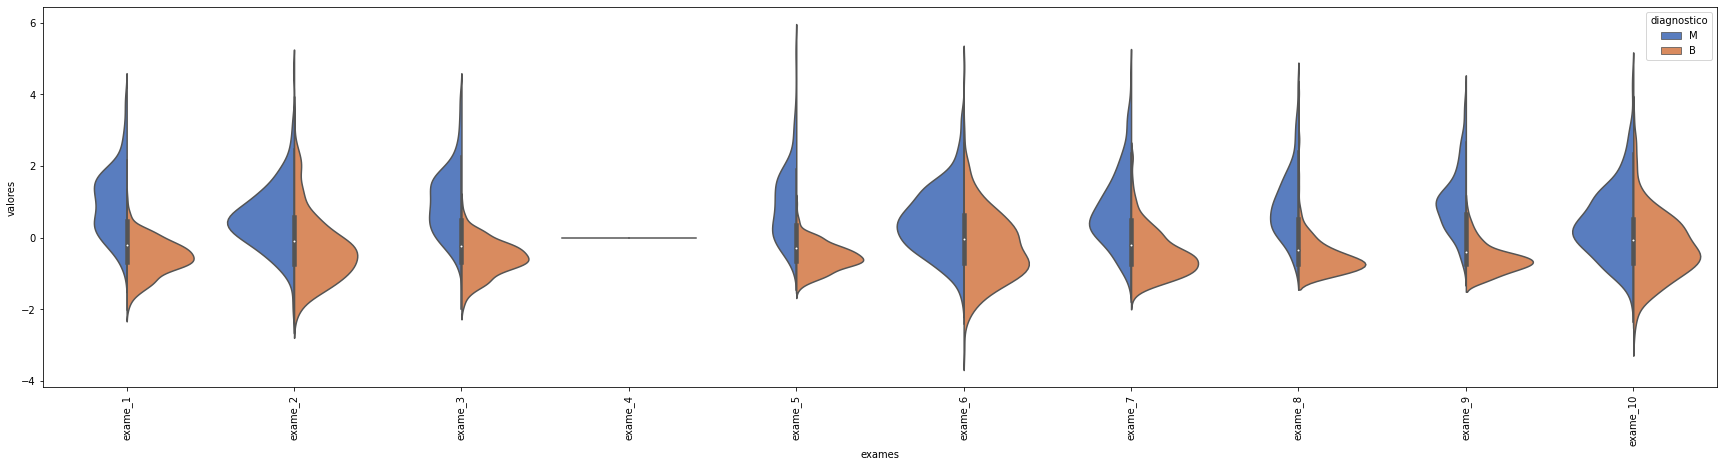

In [9]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis=1)
    dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

    plt.figure(figsize=(30,7))
    sns.violinplot(x = 'exames', y = 'valores', hue='diagnostico', data=dados_plot, palette="muted", split=True)
    plt.xticks(rotation = 90)


grafico_violino(valores_exames_v2, 0, 10)


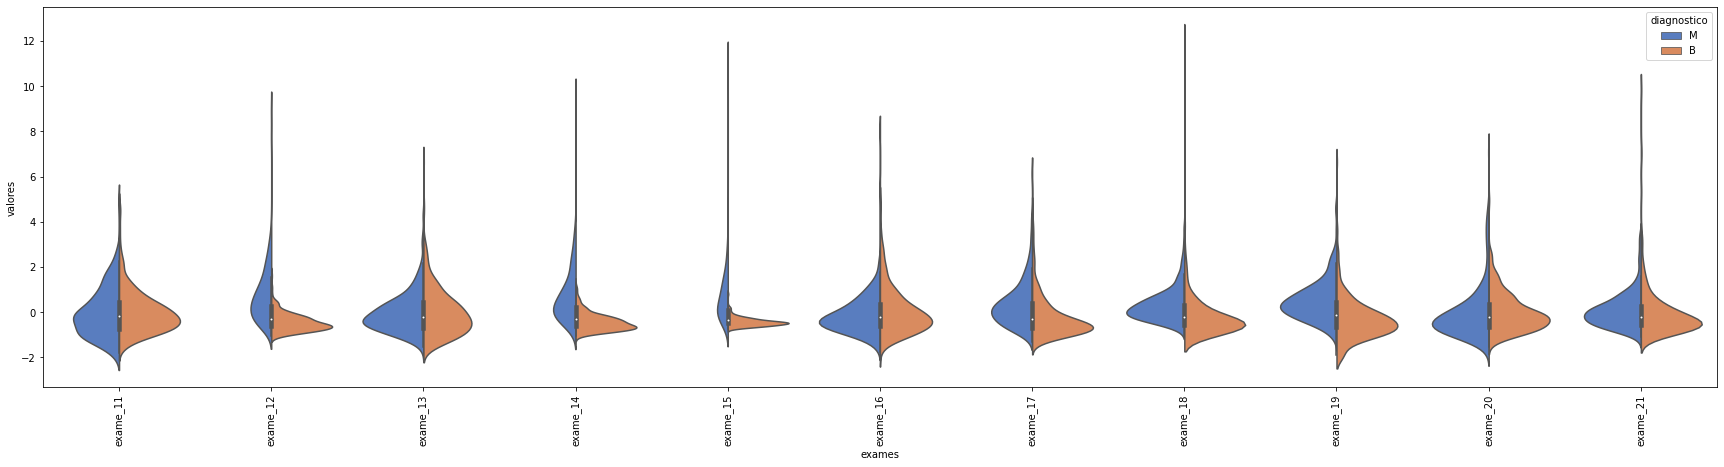

In [10]:
grafico_violino(valores_exames_v2, 10, 21)

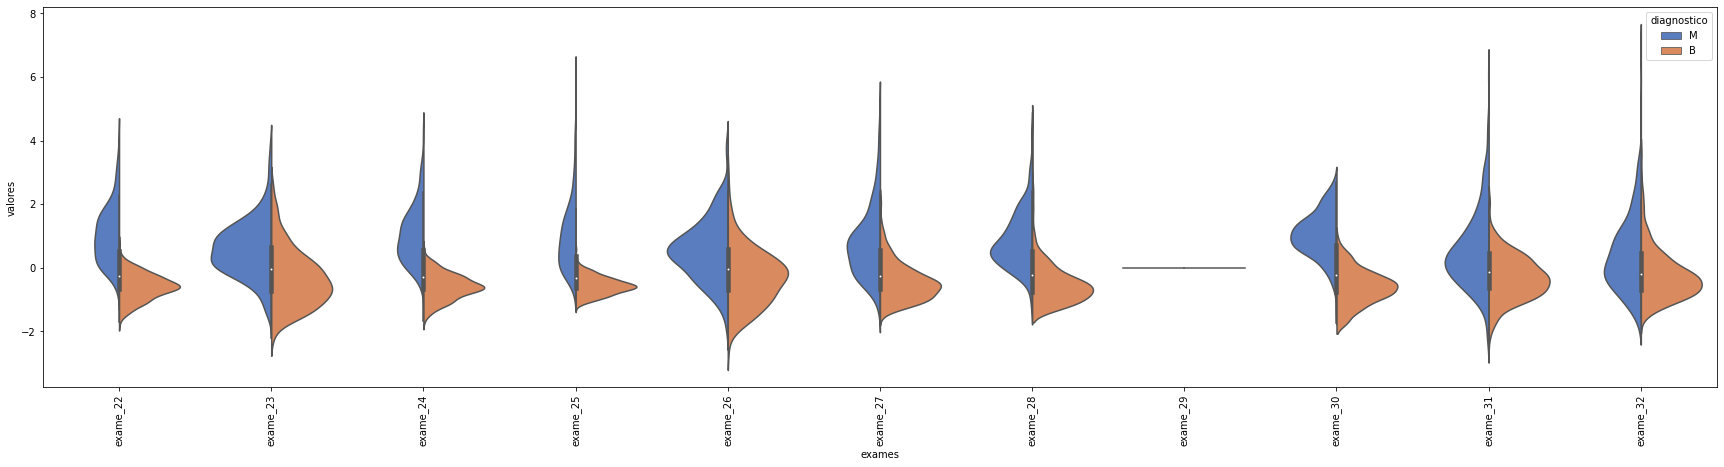

In [11]:

grafico_violino(valores_exames_v2, 21, 32)

In [12]:
# Retirando as colunas que apresentam valores constantes.

valores_exames_v3 = valores_exames_v2.drop(columns=['exame_29', 'exame_4'])
valores_exames_v3

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [13]:
# Realizando a classificação:

def classificar(valores):
    SEED = 1234
    random.seed(SEED)
    
    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)

    classificador = RandomForestClassifier(n_estimators=100)
    classificador.fit(treino_x, treino_y)

    # calculando a acurácia:
    print(str(classificador.score(teste_x, teste_y)*100) + '%')

In [14]:
classificar(valores_exames_v3)

92.98245614035088%


Ou seja, apesar de ter removidos algumas colunas que não acrescentavam em nada no nosso modelo, aumentamos muito pouco em relação ao baseline. Antes de 92.4% agora de 92.98%.

# 03. Dados Correlacionados

Para visualizar os dados correlacionados, vamos utilizar a visualização através de um [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) do seaborn.

<AxesSubplot:>

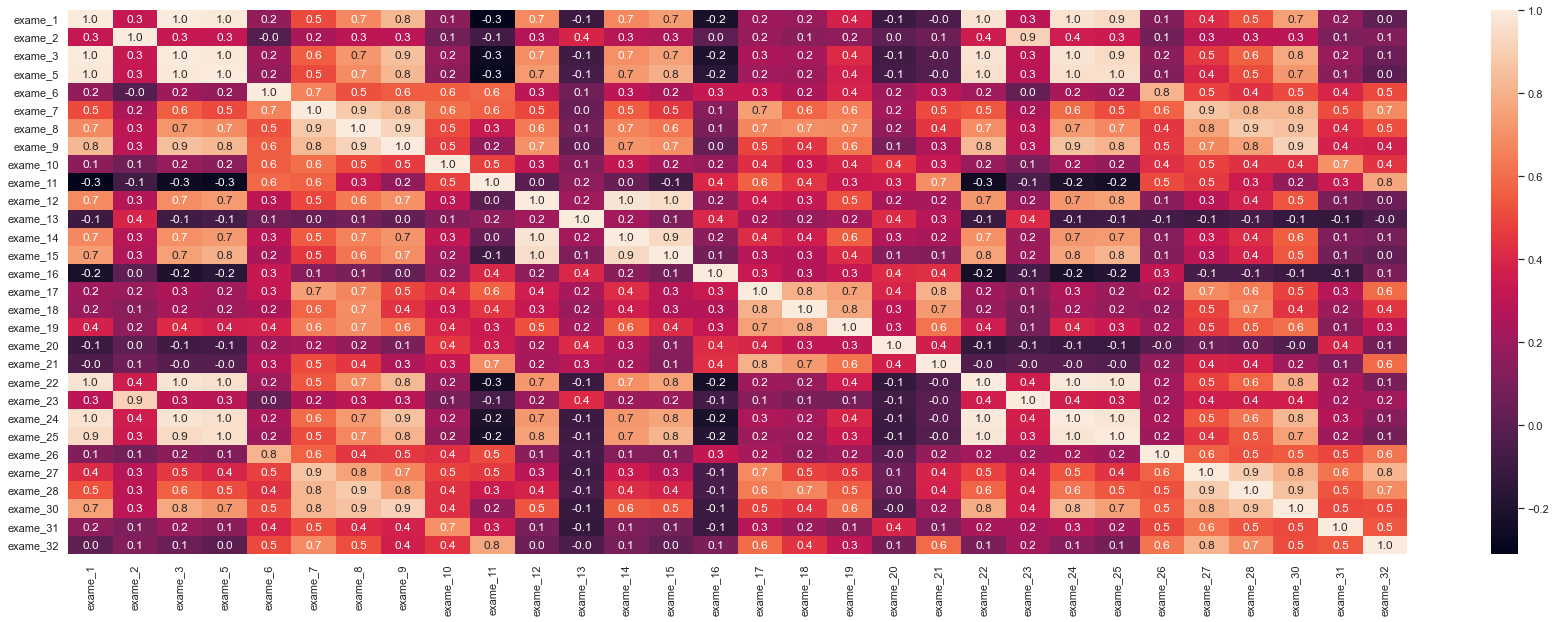

In [15]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize=(30,10))
sns.set(font_scale=1)
sns.heatmap(matriz_correlacao, annot=True, fmt='.1f')

In [16]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99] 
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2.head()

exame_1    1.997855
exame_2    1.000000
exame_3    1.997855
exame_5    1.000000
exame_6    1.000000
dtype: float64

In [18]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [19]:
# Removendo as variáveis correlacionadas:

valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.keys())
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [20]:
classificar(valores_exames_v4)

91.81286549707602%


Nosso resultado foi pior do que os resultados que estávamos obtendo, inclusive menor que o baseline. Isso foi devido a exclusão de todos os dados correlacionados. Deveríamos ter excluído apenas uma delas e não as duas.

*Mas quanto mais variáveis correlacionadas não é melhor para a performance do modelo?*

In [21]:
"""
Colunas correlacionadas:

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708

"""

# Foi escolhido deixar as colunas correlacionadas exame_1 e exame_3, pois elas são as mais importantes para a classificação:

valores_exame_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])
valores_exame_v5.head()

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [22]:
classificar(valores_exame_v5)

92.98245614035088%


O nosso resultado se manteve, mesmo removendo as colunas correlacionadas.

Devemos ter cuidado ao analisar a relação entre correlação e causalidade. Algumas correlação não nescessariamente são causais. ver o site [here](https://www.tylervigen.com/spurious-correlations) que mostra algumas correlações que não fazem sentido.

Ver também esse [site](https://operdata.com.br/blog/coeficientes-de-correlacao/) que explica um pouco o significado do coeficiente de correlação.

# 04. Automatizando a seleção

Será que de alguma maneira eu consigo selecionar as *k* melhores features? Sim, vamos utilizar o [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) do sklearn.

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SEED = 1234
random.seed(SEED)

# A função chi2 (quiquadrada) não aceita valores negativos, por isso não podemos usar o valores_exame_v5
# voltamos, portanto, para o valores_exames_v1 que são os dados antes da transformação e removemos tudo que foi removido a posteriori.

valores_exame_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

selecionar_kmelhores = SelectKBest(chi2, k = 5)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exame_v6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [24]:
treino_x

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
391,8.734,16.84,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,0.07098,0.5169,...,0.006736,10.17,22.80,317.0,0.1460,0.1310,0.00000,0.00000,0.2445,0.08865
410,11.360,17.57,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,0.05913,0.1916,...,0.001659,13.05,36.32,521.3,0.1453,0.1622,0.18110,0.08698,0.2973,0.07745
138,14.950,17.57,678.1,0.11670,0.13050,0.15390,0.08624,0.1957,0.06216,1.2960,...,0.002887,18.55,21.43,971.4,0.1411,0.2164,0.33550,0.16670,0.3414,0.07147
261,17.350,23.06,933.1,0.08662,0.06290,0.02891,0.02837,0.1564,0.05307,0.4007,...,0.001578,19.85,31.47,1218.0,0.1240,0.1486,0.12110,0.08235,0.2452,0.06515
507,11.060,17.12,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,0.1779,...,0.008313,11.69,20.74,411.1,0.1662,0.2031,0.12560,0.09514,0.2780,0.11680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,13.850,15.18,587.4,0.09516,0.07688,0.04479,0.03711,0.2110,0.05853,0.2479,...,0.001593,14.98,21.74,670.0,0.1185,0.1724,0.14560,0.09993,0.2955,0.06912
372,21.370,15.10,1386.0,0.10010,0.15150,0.19320,0.12550,0.1973,0.06183,0.3414,...,0.004367,22.69,21.84,1535.0,0.1192,0.2840,0.40240,0.19660,0.2730,0.08666
204,12.470,18.60,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,0.3961,...,0.003586,14.97,24.64,677.9,0.1426,0.2378,0.26710,0.10150,0.3014,0.08750
53,18.220,18.70,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,0.06310,0.8337,...,0.005126,20.60,24.13,1321.0,0.1280,0.2297,0.26230,0.13250,0.3021,0.07987


In [25]:
classifcador = RandomForestClassifier(n_estimators=100, random_state=1234)

classificador = classifcador.fit(treino_kbest, treino_y)

# calculando a acurácia:
print(str(classificador.score(teste_kbest, teste_y)*100) + '%')

92.39766081871345%


Obtemos um resultado bem interessante com o SelectKBest, que seleciona as k melhores features. Reduzimos o nosso banco de dados em 85% e a performance do modelo aumentou diminuiu nem 1%. 

Mas será que olhar apenas para acurácia é suficiente?

Ou será que temos que entrar um pouco mais nas análises?

Vamos ver outra forma de analisar os resultados de classificação.

Mesmo depois de remover um monte de colunas nossa acurácia permaneceu quase inalterada, mas será que há outro impacto por trás disso? será que estou acertando mais quando o câncer é do tipo benigno ou errando mais quando é maligno? a forma de analisar isso é através da [matriz de confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

![](https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png)


Our model's score is now 92.98%


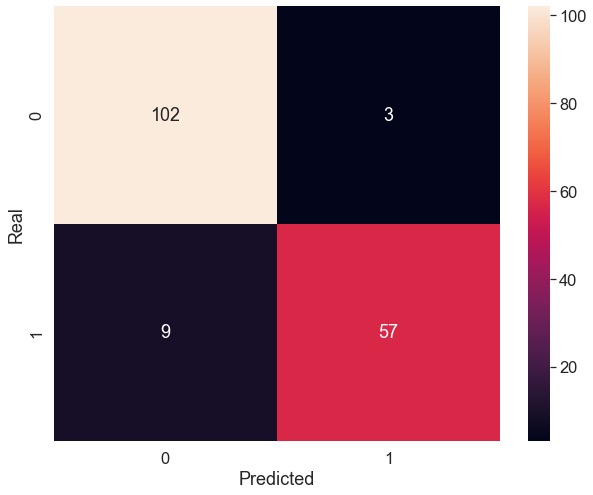

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(valores_exame_v6, diagnostico, test_size=0.3)

model = RandomForestClassifier(n_estimators=100, random_state=1234)
model.fit(train_x, train_y)

rfe_selector = RFE(estimator=model, n_features_to_select=10, step=1)
rfe_selector.fit(train_x, train_y)
train_rfe = rfe_selector.transform(train_x)
test_rfe = rfe_selector.transform(test_x)

model.fit(train_rfe, train_y)

confusion_matrix = confusion_matrix(test_y, model.predict(test_rfe))
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.5)
sns.heatmap(confusion_matrix, annot=True, fmt="d").set(xlabel='Predicted', ylabel='Real')

print("Our model's score is now %.2f%%" % (model.score(test_rfe, test_y) * 100))

In [26]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

In [27]:
# Questão do aluno https://cursos.alura.com.br/forum/topico-como-descobrir-qual-categoria-e-o-0-ou-o-1-191746

# from sklearn.metrics import ConfusionMatrixDisplay

# ConfusionMatrixDisplay.from_predictions(teste_y, classificador.predict(teste_kbest), labels=teste_y.unique())
# plt.grid(False)

In [28]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

In [29]:
teste_y.value_counts()

B    105
M     66
Name: diagnostico, dtype: int64

B    105
M     66
Name: diagnostico, dtype: int64

[Text(0.5, 44.5, 'predito'), Text(107.5, 0.5, 'real')]

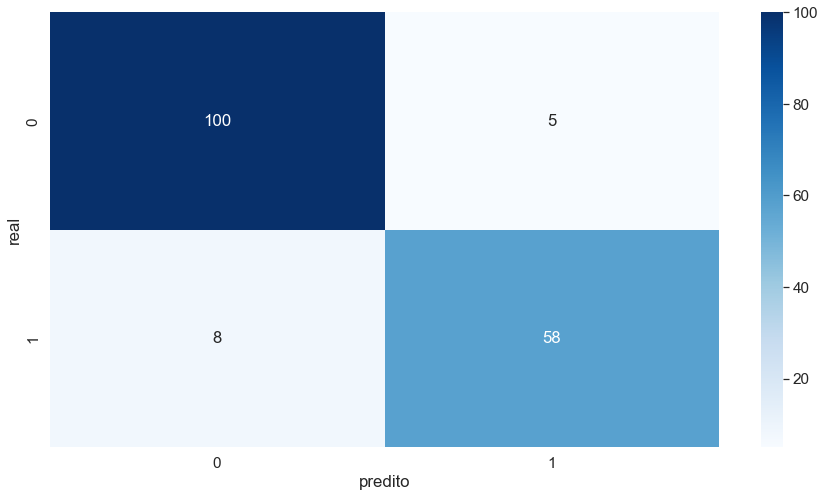

In [30]:
# import numpy as np

# groups_names = ['True Neg (TN)','False Pos (FP)','False Neg (FN)','True Pos (TP)']
# group_counts = [f"{value}" for value in matriz_confusao.flatten()]
# group_percentages = [f"{value*100:.2f} %" for value in matriz_confusao.flatten()/np.sum(matriz_confusao)]
# labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(groups_names, group_counts, group_percentages)]

# labels = np.asarray(labels).reshape(2,2)

display(teste_y.value_counts())

plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(matriz_confusao, annot=True, fmt='', cmap='Blues').set(xlabel='predito', ylabel='real')

Vamos agora utilizar outro método para seleção das melhores features, que é o [*RFE*](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In [31]:
from sklearn.feature_selection import RFE
from numpy import random

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exame_v6, diagnostico, test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)

# Pegando as 5 melhores features:
selecionador_rfe = RFE(estimator = classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

# calculando a acurácia:
print(f"{classificador.score(teste_rfe, teste_y)*100:.2f} %")

90.06 %


90.05847953216374%


[Text(0.5, 44.5, 'predito'), Text(107.5, 0.5, 'real')]

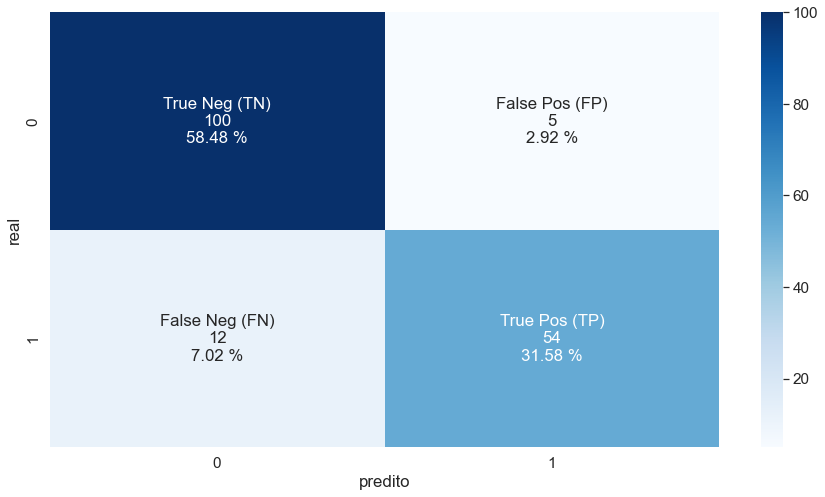

In [33]:
from sklearn.feature_selection import RFE
from numpy import random
import numpy as np


SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exame_v6, diagnostico, test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)

# Pegando as 5 melhores features:
selecionador_rfe = RFE(estimator = classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

# calculando a acurácia:
print(str(classificador.score(teste_rfe, teste_y)*100) + '%')

# Plotando a matriz de confusão:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
matriz_confusao
groups_names = ['True Neg (TN)','False Pos (FP)','False Neg (FN)','True Pos (TP)']
group_counts = [f"{value}" for value in matriz_confusao.flatten()]
group_percentages = [f"{value*100:.2f} %" for value in matriz_confusao.flatten()/np.sum(matriz_confusao)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(groups_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(matriz_confusao, annot=labels, fmt='', cmap='Blues').set(xlabel='predito', ylabel='real')

90.05847953216374%


[Text(0.5, 44.5, 'predito'), Text(107.5, 0.5, 'real')]

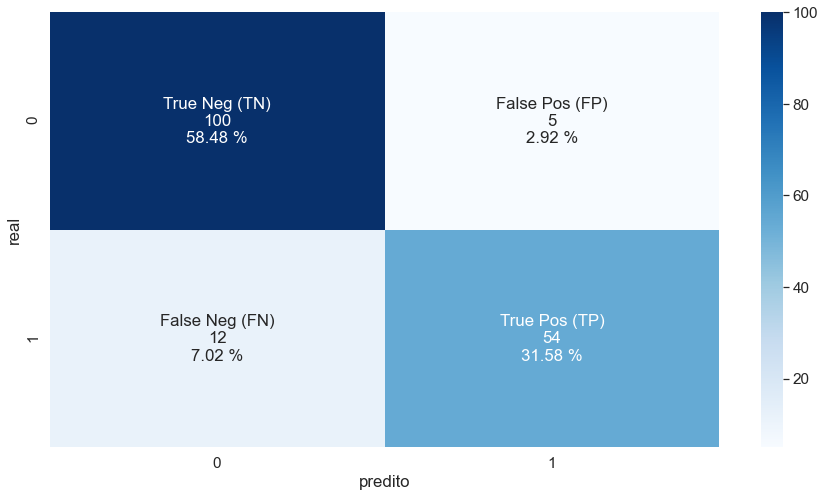

In [ ]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exame_v6, diagnostico, test_size=0.3)
classifcador = RandomForestClassifier(n_estimators=100, random_state=1234)
classifcador.fit(treino_x, treino_y)

# Pegando as 5 melhores features:
selecionador_rfe = RFE(estimator = classificador, n_features_to_select=5, step=1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

# calculando a acurácia:
print(str(classificador.score(teste_rfe, teste_y)*100) + '%')

# Plotando a matriz de confusão:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
matriz_confusao
groups_names = ['True Neg (TN)','False Pos (FP)','False Neg (FN)','True Pos (TP)']
group_counts = [f"{value}" for value in matriz_confusao.flatten()]
group_percentages = [f"{value*100:.2f} %" for value in matriz_confusao.flatten()/np.sum(matriz_confusao)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(groups_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(matriz_confusao, annot=labels, fmt='', cmap='Blues').set(xlabel='predito', ylabel='real')

Percebemos que utilizando o método RFE nosso resultado piorou um pouco. Saiu de 92.4% para 90.06%. A principal diferença foi na classificação dos câncer 1 que classificou como 0 o que na verdade era 1. 

# 05. Visualizando dados no plano:

A questão agora é: será que existe alguma técnica que nos informa qual conjunto de features gerará o melhor resultado? Essa técnica é o [RFE Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html) (RFECV). 

C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


92.98245614035088%


[Text(0.5, 44.5, 'predito'), Text(107.5, 0.5, 'real')]

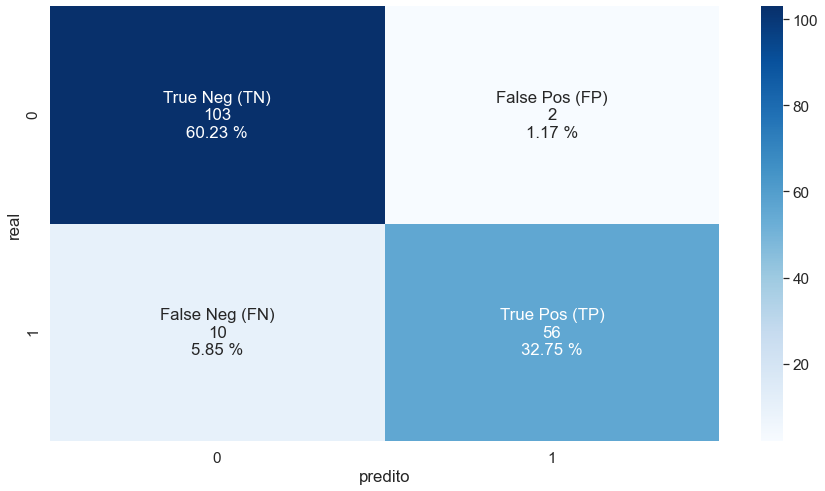

In [ ]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exame_v6, diagnostico, test_size=0.3)
classifcador = RandomForestClassifier(n_estimators=100, random_state=1234)
classifcador.fit(treino_x, treino_y)

# Pegando as 5 melhores features:
selecionador_rfecv = RFECV(estimator = classificador, cv = 5, step=1, scoring='accuracy')
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

# calculando a acurácia:
print(str(classificador.score(teste_rfecv, teste_y)*100) + '%')

# Plotando a matriz de confusão:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
groups_names = ['True Neg (TN)','False Pos (FP)','False Neg (FN)','True Pos (TP)']
group_counts = [f"{value}" for value in matriz_confusao.flatten()]
group_percentages = [f"{value*100:.2f} %" for value in matriz_confusao.flatten()/np.sum(matriz_confusao)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(groups_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(15,8))
sns.set(font_scale=1.4)
sns.heatmap(matriz_confusao, annot=labels, fmt='', cmap='Blues').set(xlabel='predito', ylabel='real')

In [ ]:
# Quais features foram usadas?

treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

C:\Users\Bruno\Anaconda3\envs\ambiente\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


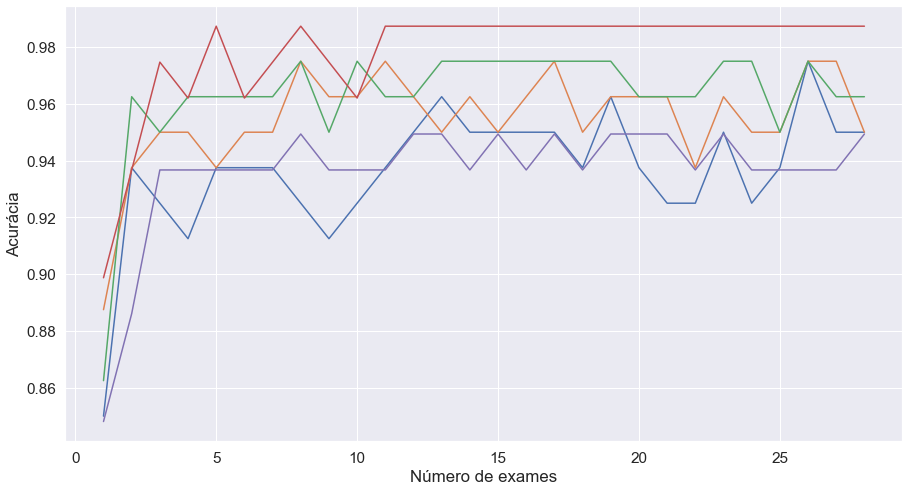

In [ ]:
# Plotantando um gráfico para analisar o porquê ele escolhei as 26 features:

import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.xlabel('Número de exames')
plt.ylabel('Acurácia')
plt.plot(range(1, len(selecionador_rfecv.grid_scores_) + 1), selecionador_rfecv.grid_scores_)

In [ ]:
valores_exame_v7 = selecionador_rfe.transform(valores_exame_v6)
valores_exame_v7.shape

(569, 5)

<AxesSubplot:>

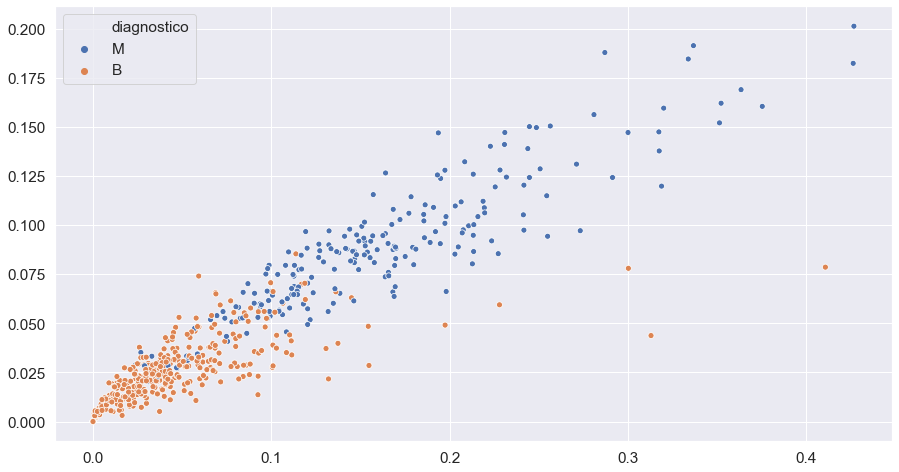

In [ ]:
import seaborn as sns

plt.figure(figsize=(15,8))
sns.scatterplot(x = valores_exame_v7[:, 0], y = valores_exame_v7[:, 1], hue = diagnostico)

Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas é o [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). O PCA opera uma transformação matemática sobre os dados, na qual as primeiras dimensões serão as variáveis que manterão o maior volume possível de informação dos nossos dados. Vamos aplicar o PCA nos nossos dados e verificar como ficará a visualização, já que a criada com o feature selection não nos pareceu uma ótima solução.

In [ ]:
valores_exame_v5.shape

(569, 28)

In [ ]:
(valores_exame_v5.loc[0]==0.207963).sum()

0

<AxesSubplot:>

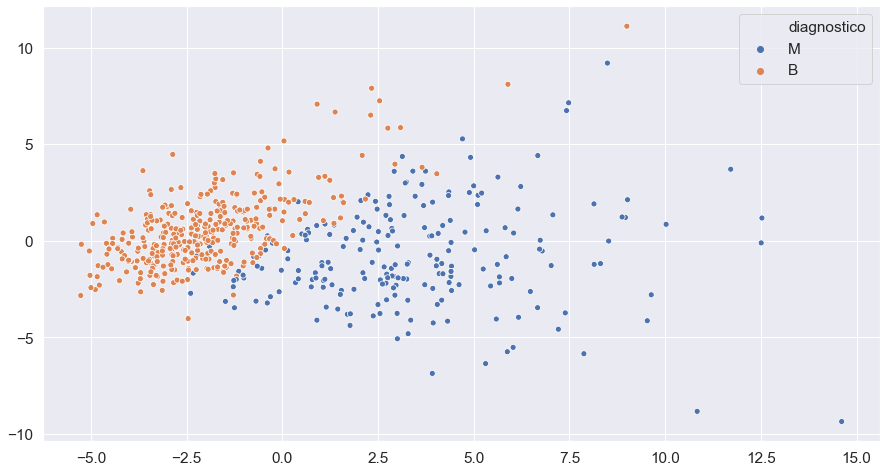

In [ ]:
from sklearn.decomposition import PCA

# O PCA se comporta melhor quando temos os dados já normalizados.

pca = PCA(n_components=2)
valores_exame_v8 = pca.fit_transform(valores_exame_v5)
plt.figure(figsize=(15,8))
sns.scatterplot(x = valores_exame_v8[:, 0], y = valores_exame_v8[:, 1], hue = diagnostico)


Ainda existe uma técnica que se comporta melhor quando queremos gerar visualizações, chamada [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), que também está presente no SKlearn. De maneira resumida, a t-SNE tenta manter as distâncias entre os pontos.

Por exemplo, se calcularmos a distância entre o ponto 0 e o ponto 1, teremos um valor em 28 dimensões, que é a quantidade de features do nosso conjunto. O t-SNE tenta manter a proporção dessas distâncias na redução para dimensões menores, permitindo que tenhamos uma noção de quão distante um ponto está do outro.

In [100]:
from sklearn.manifold import TSNE

# O PCA se comporta melhor quando temos os dados já normalizados.
tsne = TSNE(n_components=2, init='random', learning_rate = 200)
valores_exame_v9 = tsne.fit_transform(valores_exame_v5)
valores_exame_v9.shape

(569, 2)

In [102]:
valores_exame_v9

array([[ 18.766836 , -28.91297  ],
       [ 17.894503 , -13.388678 ],
       [ 18.057018 , -21.606197 ],
       ...,
       [ 10.684896 ,  -7.897295 ],
       [ 21.228313 , -29.992207 ],
       [ -3.3711364,  26.99757  ]], dtype=float32)

<AxesSubplot:>

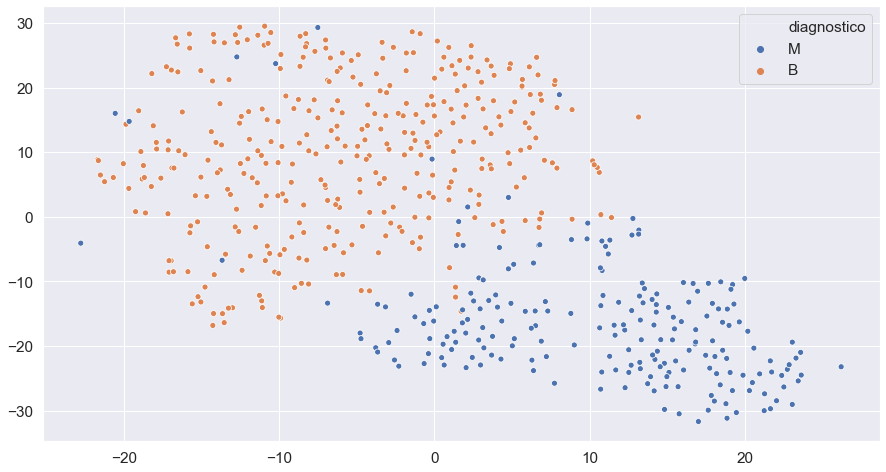

In [103]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = valores_exame_v9[:, 0], y = valores_exame_v9[:, 1], hue = diagnostico)

Essas técnicas que realizam uma transformação matemática nos dados antes de processá-los, reduzindo suas dimensões, são chamadas justamente de "redução de dimensionalidade". A diferença entre a redução de dimensionalidade e a seleção de features é que a segunda funciona como um funil que filtra as principais características de uma base de dados original.